# EASC 305: Timeseries 
## Part 3: Filtering 

In [1]:
%matplotlib notebook 

import scipy
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font',   size=SMALL_SIZE)        # controls default text sizes
plt.rc('axes',   titlesize=SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes',   labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Demo 0: Generating signals 

In [2]:
dt = 0.1                       # interval spacing
df = 1/dt                      # sampling frequency
t  = np.arange(0,100.1,dt)     # create time vector
N  = t.shape[0]                # (N) length of time vec

# sinusoid
y1 = 1.5*np.sin(2*np.pi*t/50) + 1.0*np.sin(2*np.pi*t/15) + \
     0.5*np.sin(2*np.pi*t/5)  + np.random.randn(N)

# step function
y2        = np.ones(N)
y2[N//2:] = 0
# impulse or dirac Delta function
y3        = np.zeros(N)
y3[N//2]  = 1

<IPython.core.display.Javascript object>


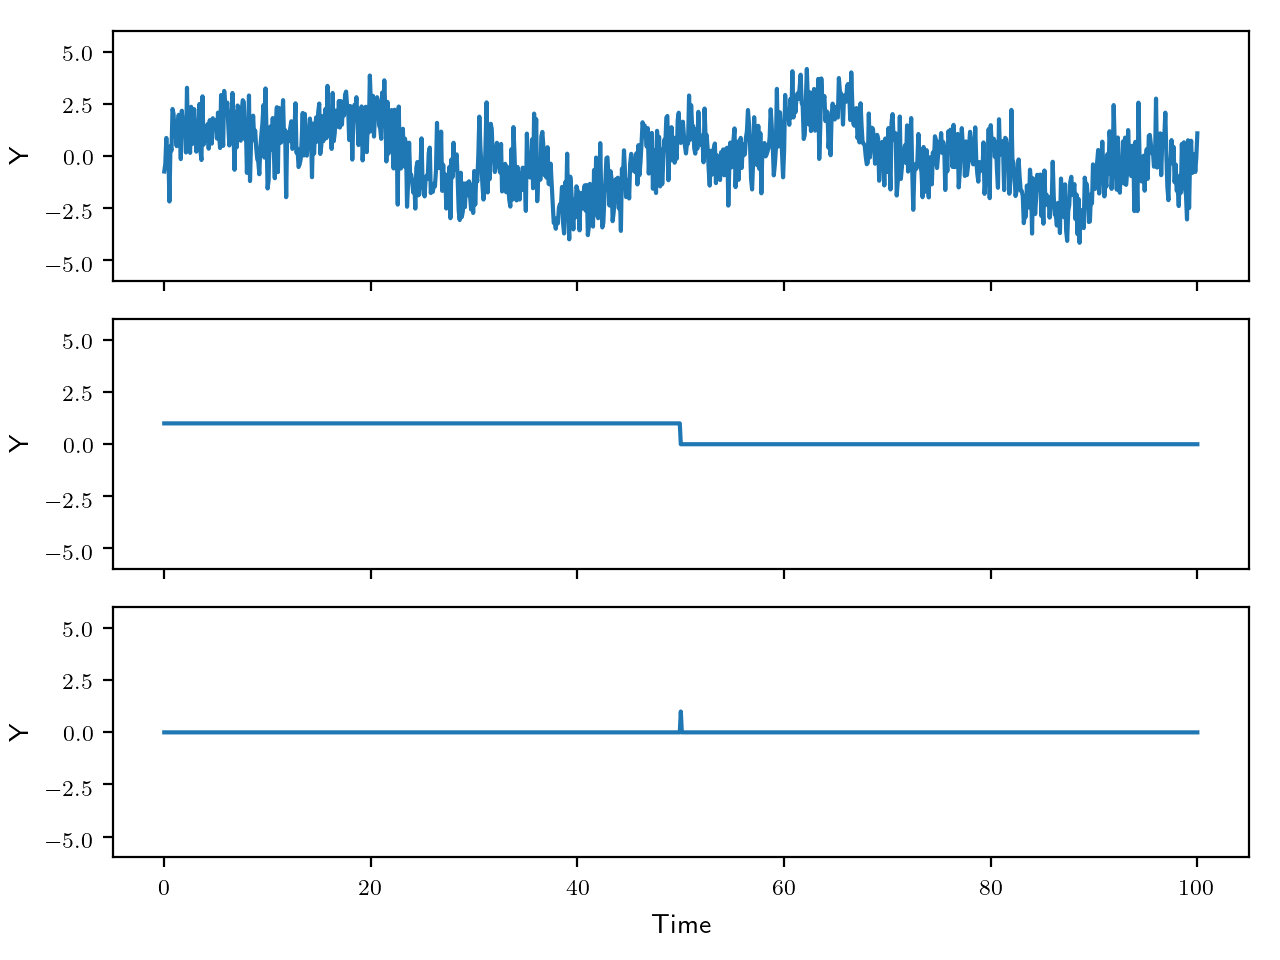

In [3]:
fig, ax = plt.subplots(3,1,sharex=True,sharey=True)

ax[0].plot(t, y1)
ax[0].set_ylim(-6,6)
ax[0].set_ylabel('Y')

ax[1].plot(t, y2)
ax[1].set_ylim(-6,6)
ax[1].set_ylabel('Y')

ax[2].plot(t, y3)
ax[2].set_ylim(-6,6)
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Y')

fig.tight_layout()

# Demo 1: Basic filtering and convolution 

In [4]:
# symmetric energy-conserving filter (boxcar)
bk1    = 0.2*np.ones(5)        # equal weights

print('Sum of Window: {}'.format(np.sum(bk1)))

y1_bk1 = y1.copy()

for i in range(2,N-3):
    y1_bk1[i] = np.dot(bk1,y1[i-2:i+3])

Sum of Window: 1.0


In [5]:
# asymmetric energy-conserving filter
bk2 = np.array([0.05, 0.08, 0.14, 0.26, 0.47]) # unequal weights

print('Sum of Window: {}'.format(np.sum(bk2)))

y1_bk2 = y1.copy()

for i in range(2,N-3):
    y1_bk2[i] = np.dot(bk2,y1[i-2:i+3])

Sum of Window: 1.0


<IPython.core.display.Javascript object>


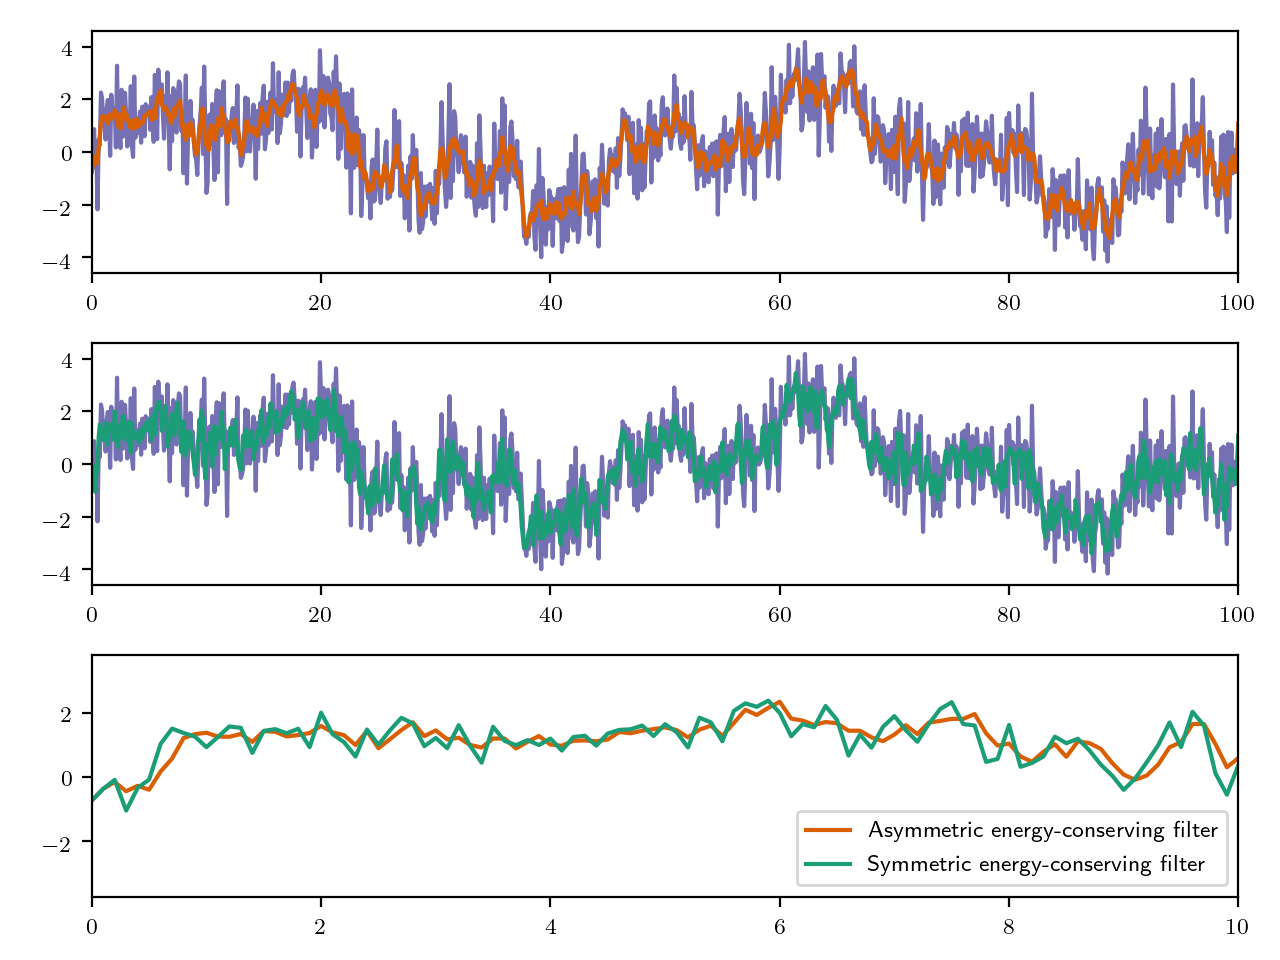

In [6]:
fig, ax = plt.subplots(3,1)

ax[0].plot(t,y1,c='#7570b3')
ax[0].plot(t,y1_bk1,c='#d95f02')
ax[0].set_xlim(0,100)

ax[1].plot(t,y1,c='#7570b3')
ax[1].plot(t,y1_bk2,c='#1b9e77')
ax[1].set_xlim(0,100)


ax[2].plot(t,y1_bk1,c='#d95f02',label='Asymmetric energy-conserving filter')
ax[2].plot(t,y1_bk2,c='#1b9e77',label='Symmetric energy-conserving filter')
ax[2].set_xlim(0,10)
ax[2].legend() 

fig.tight_layout()

In [7]:
# Testing the 'scipy.convolve' function

bk5pt = (1/5.)*np.ones(5)  # equally weighted 5-pt filter
bk3pt = (1/3.)*np.ones(3)  # equally weighted 3-pt filter
bk9pt = (1/9.)*np.ones(9)  # equally weighted 9-pt filter


y1_conv3pt = scipy.convolve(y1,bk3pt,mode='same') 
y1_conv5pt = scipy.convolve(y1,bk5pt,mode='same')
y1_conv9pt = scipy.convolve(y1,bk9pt,mode='same')

<IPython.core.display.Javascript object>


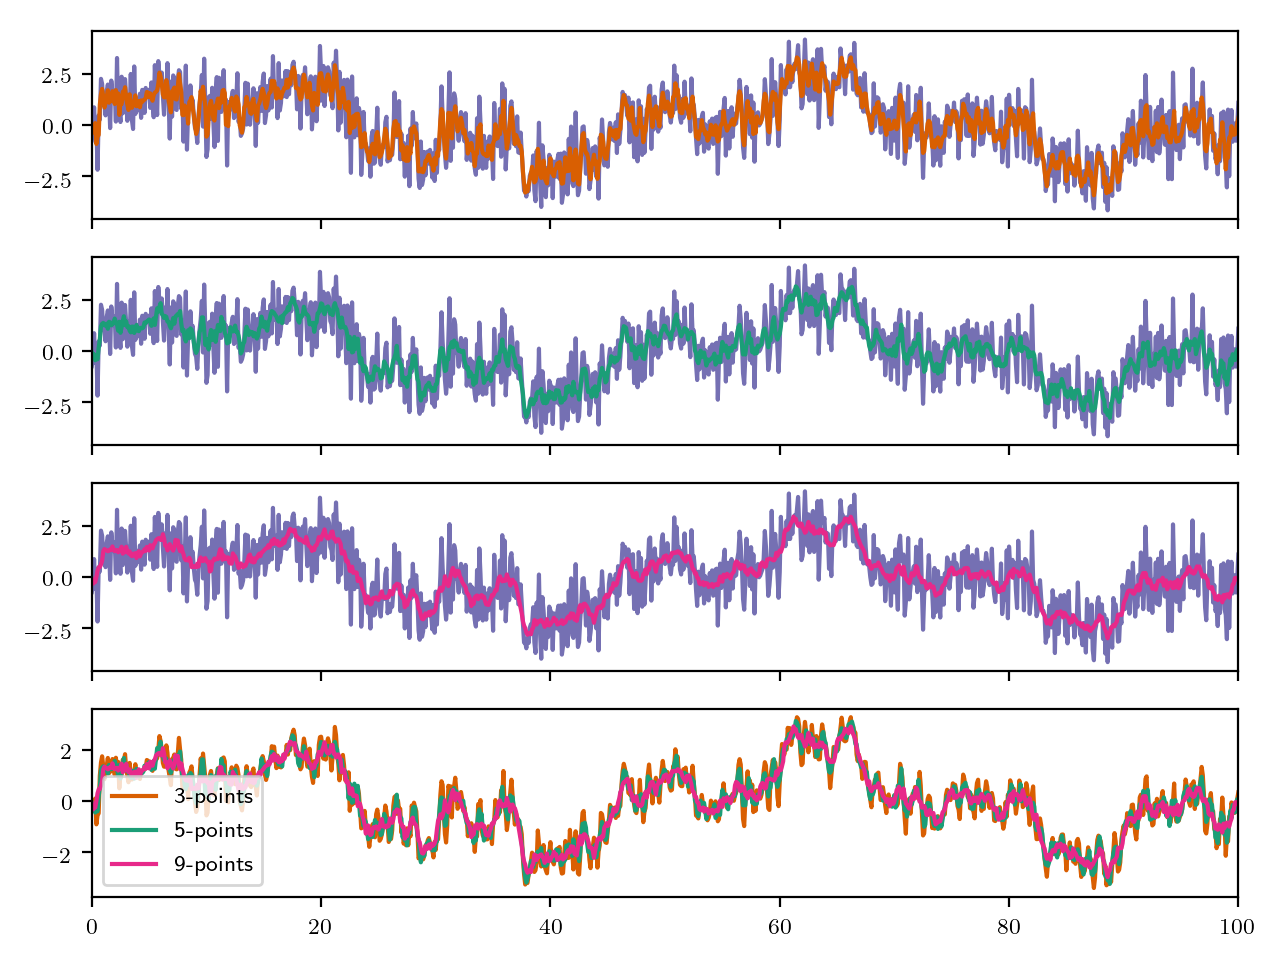

In [8]:
fig, ax = plt.subplots(4,1,sharex=True)

ax[0].plot(t,y1,c='#7570b3')
ax[0].plot(t,y1_conv3pt,c='#d95f02')

ax[1].plot(t,y1,c='#7570b3')
ax[1].plot(t,y1_conv5pt,c='#1b9e77')

ax[2].plot(t,y1,c='#7570b3')
ax[2].plot(t,y1_conv9pt,c='#e7298a')

ax[3].plot(t,y1_conv3pt,c='#d95f02',label='3-points')
ax[3].plot(t,y1_conv5pt,c='#1b9e77',label='5-points')
ax[3].plot(t,y1_conv9pt,c='#e7298a',label='9-points')
ax[3].legend()
ax[3].set_xlim(0,100)

fig.tight_layout()

In [9]:
import scipy.signal as signal

# examine effects of filter by plotting power spectra:
f0, pxx0 = signal.periodogram(y1,nfft=2**10,fs=df)
f3, pxx3 = signal.periodogram(y1_conv3pt,nfft=2**10,fs=df)
f5, pxx5 = signal.periodogram(y1_conv5pt,nfft=2**10,fs=df)
f9, pxx9 = signal.periodogram(y1_conv9pt,nfft=2**10,fs=df)

<IPython.core.display.Javascript object>


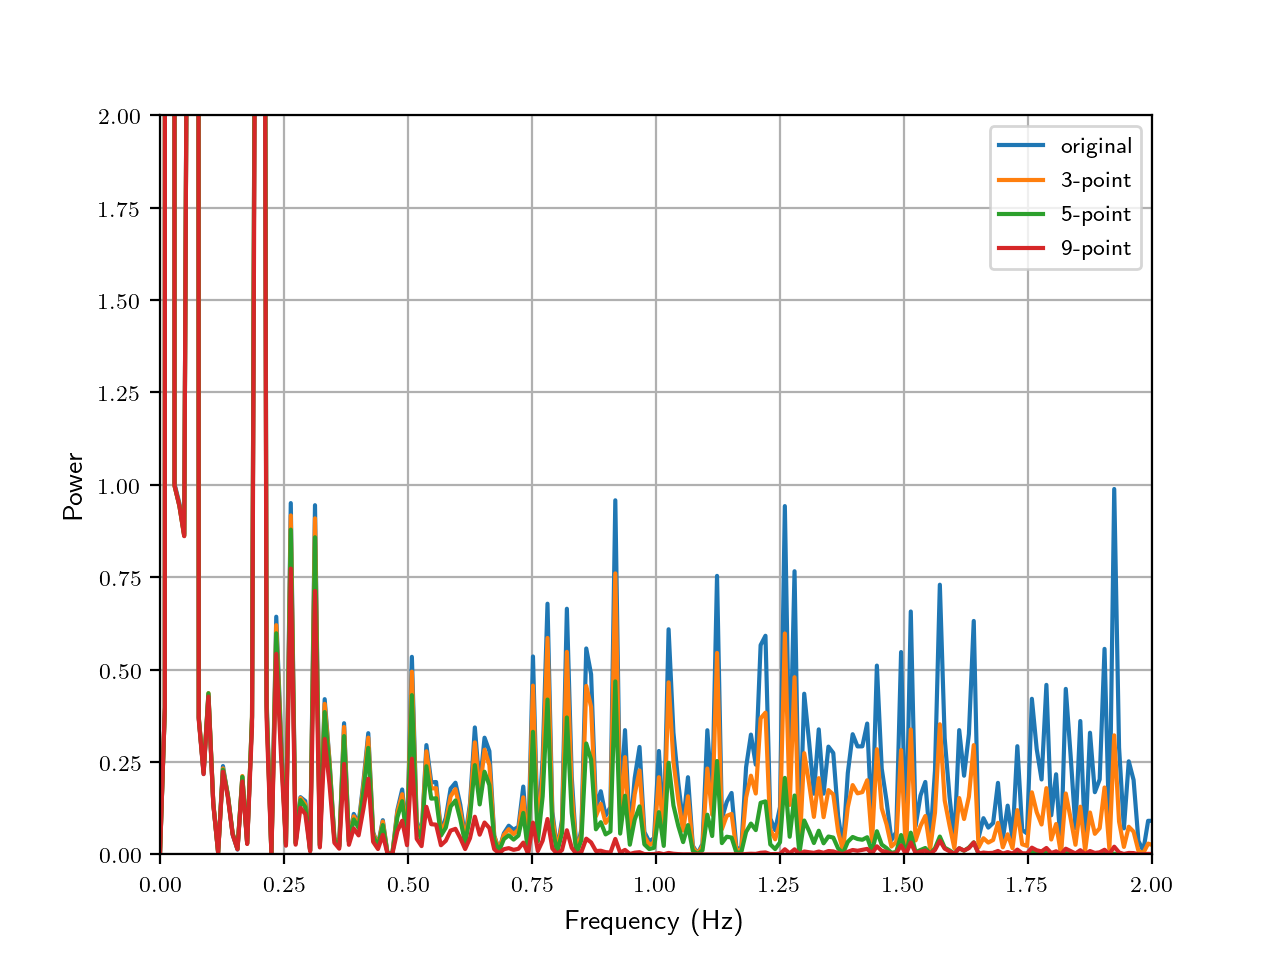

(0, 2)

In [10]:
fig, ax = plt.subplots()

ax.plot(f0, pxx0,label='original')
ax.plot(f3, pxx3,label='3-point')
ax.plot(f5, pxx5,label='5-point')
ax.plot(f9, pxx9,label='9-point')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')

ax.grid(True)
ax.legend()

ax.set_xlim(0,2)
ax.set_ylim(0,2)

In [11]:
# Testing the 'filter' function in Matlab
y1_filt1       = signal.lfilter(bk3pt,1,y1)

# shift filtered timeseries and fill empty elements with zeros:
y1_filt2       = y1_filt1.copy()
y1_filt2[1:-1] = y1_filt1[(5-2)//2+1:]

<IPython.core.display.Javascript object>


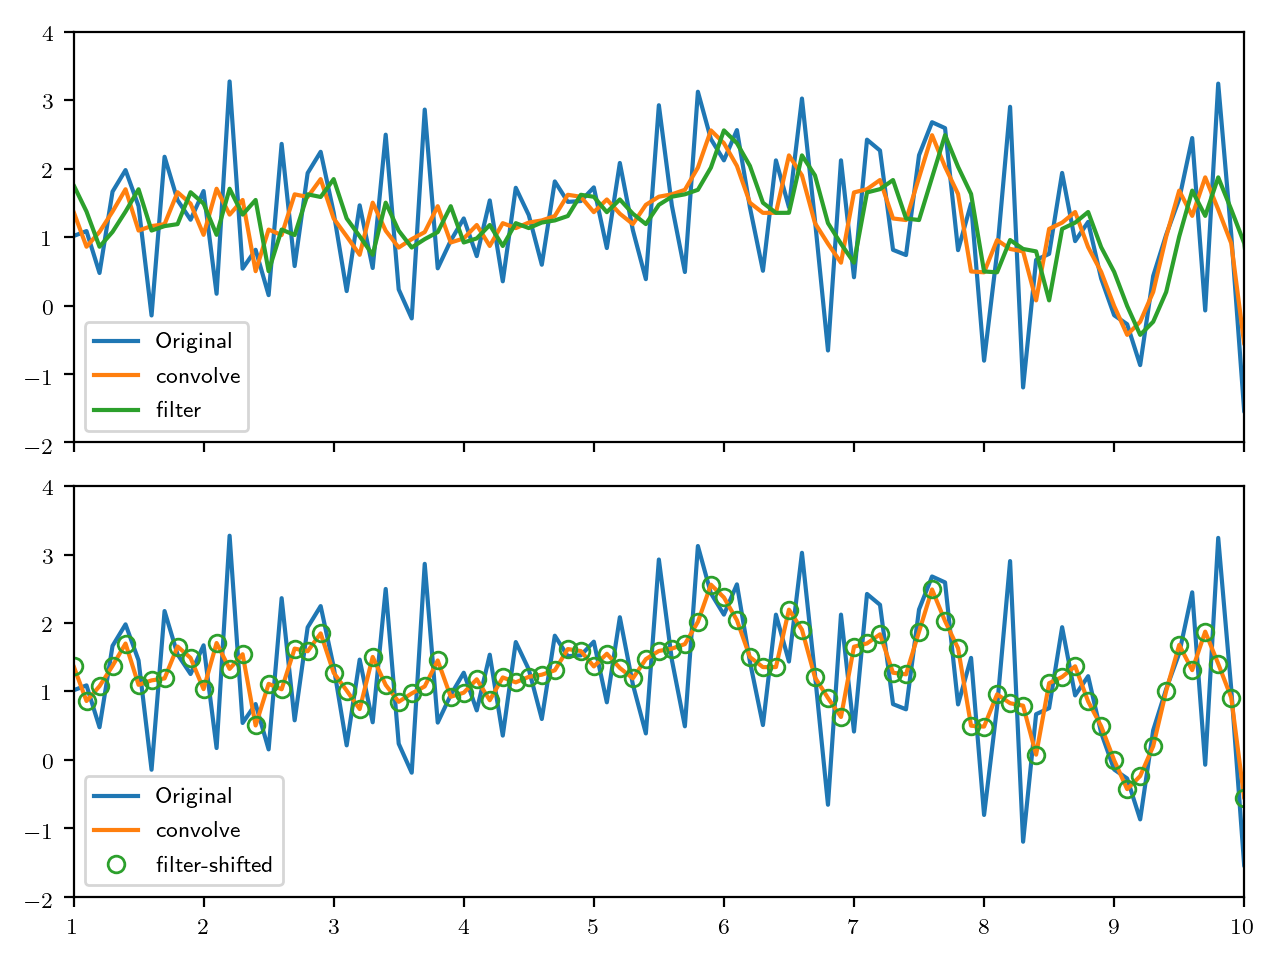

In [12]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(t,y1,        label='Original')
ax[0].plot(t,y1_conv3pt,label='convolve')
ax[0].plot(t,y1_filt1,  label='filter')
ax[0].legend()

ax[0].set_ylim(-2,4)
ax[0].set_xlim(1,10)


ax[1].plot(t,y1,label='Original')
ax[1].plot(t,y1_conv3pt,label='convolve')
ax[1].plot(t,y1_filt2,'o',markerfacecolor='None',label='filter-shifted')
ax[1].legend()

ax[1].set_ylim(-2,4)
ax[1].set_xlim(1,10)


fig.tight_layout()

# Demo 2: Frequency response of filters (see Trauth Ch. 6)

In [13]:
dt  = 0.1                       # interval spacing
df  = 1/dt                      # sampling frequency
t   = np.arange(0,100.1,dt)     # create time vector
N   = t.shape[0]                # (N) length of time vec
bk4 = (1/101)*np.ones(101)      # equally weighted filter

# convolve with scipy function

# generate synthetic time series (sine wave of period 20)
y4       = 2*np.sin(2*np.pi*t/20)    # create synthetic data
y4_conv1 = scipy.convolve(y4,bk4,mode='same')
# fractional reduction of original signal:
fr1      = np.max(y4_conv1)/np.max(y4)
print('Fractional reduction (signal 1): {}'.format(fr1))

# generate synthetic time series (sine wave of period 15)
y5       = 2*np.sin(2*np.pi*t/15)
y5_conv1 = scipy.convolve(y5,bk4,mode='same')
# fractional reduction of original signal:
fr2      = np.max(y5_conv1)/np.max(y5)
print('Fractional reduction (signal 2): {}'.format(fr2))

Fractional reduction (signal 1): 0.6302647639888277
Fractional reduction (signal 2): 0.4727720174724538


Same filter has a different effect on a signal of different frequency/period

<IPython.core.display.Javascript object>


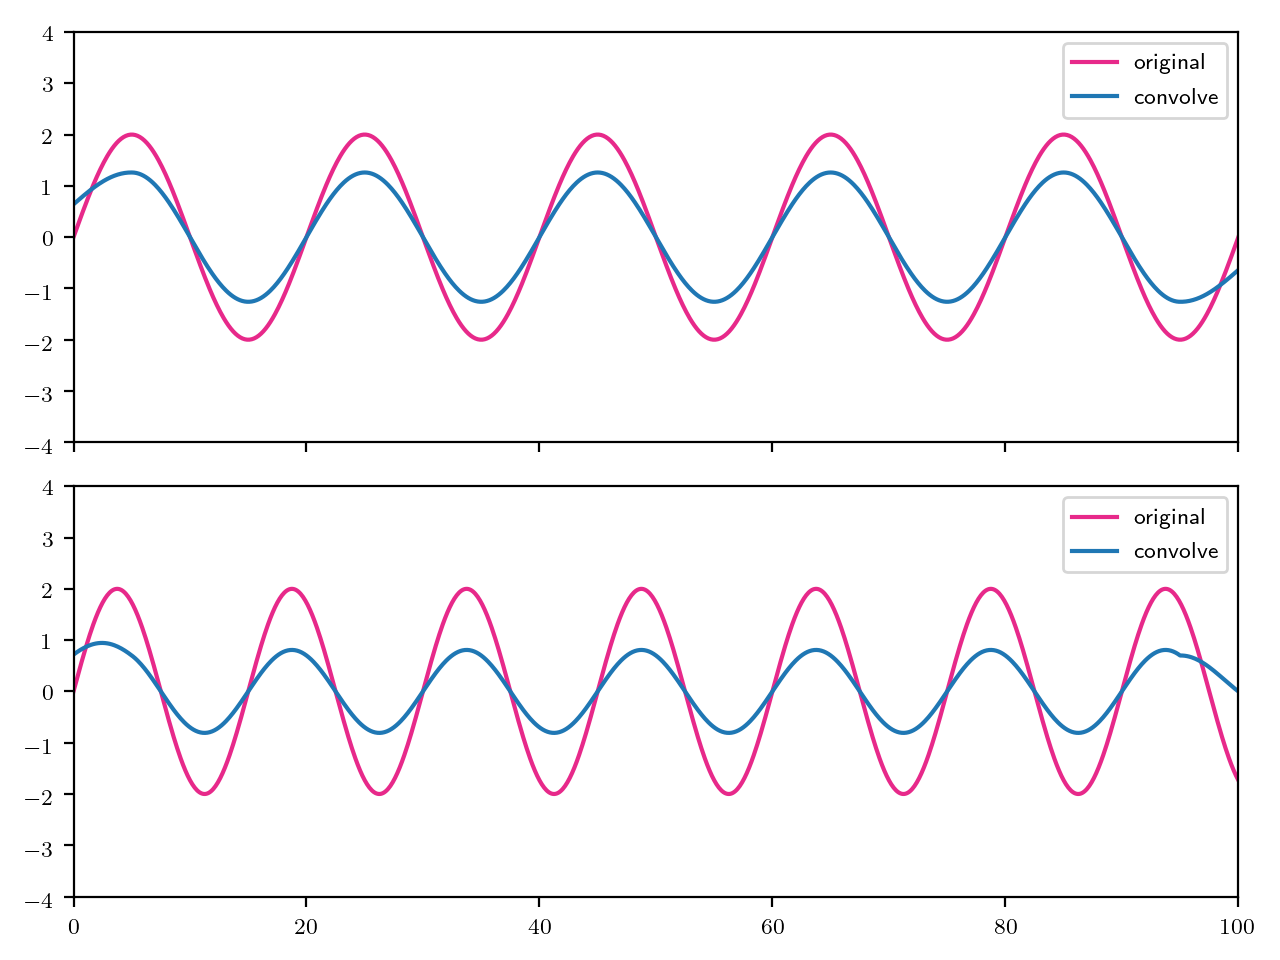

In [14]:
fig, ax = plt.subplots(2,1,sharex=True,sharey=True)

ax[0].plot(t,y4, c='#e7298a',label='original')
ax[0].plot(t,y4_conv1, label='convolve')
ax[0].legend()

ax[0].set_xlim(0,100)
ax[0].set_ylim(-4,4)

ax[1].plot(t,y5, c='#e7298a',label='original')
ax[1].plot(t,y5_conv1,label='convolve')
ax[1].legend()

fig.tight_layout()

In [15]:
# Use scipy.signal function "freqz" to characterize filter frequency response
w4, h4 = signal.freqz(bk4,a=1,worN=512,fs=df)
amp4   = np.sqrt(np.real(h4)**2 + np.imag(h4)**2)        # calculate amplitude 
phs4   = np.arctan(np.imag(h4)/np.real(h4))*180/np.pi    # calculate phase 

/Users/andrewnolan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


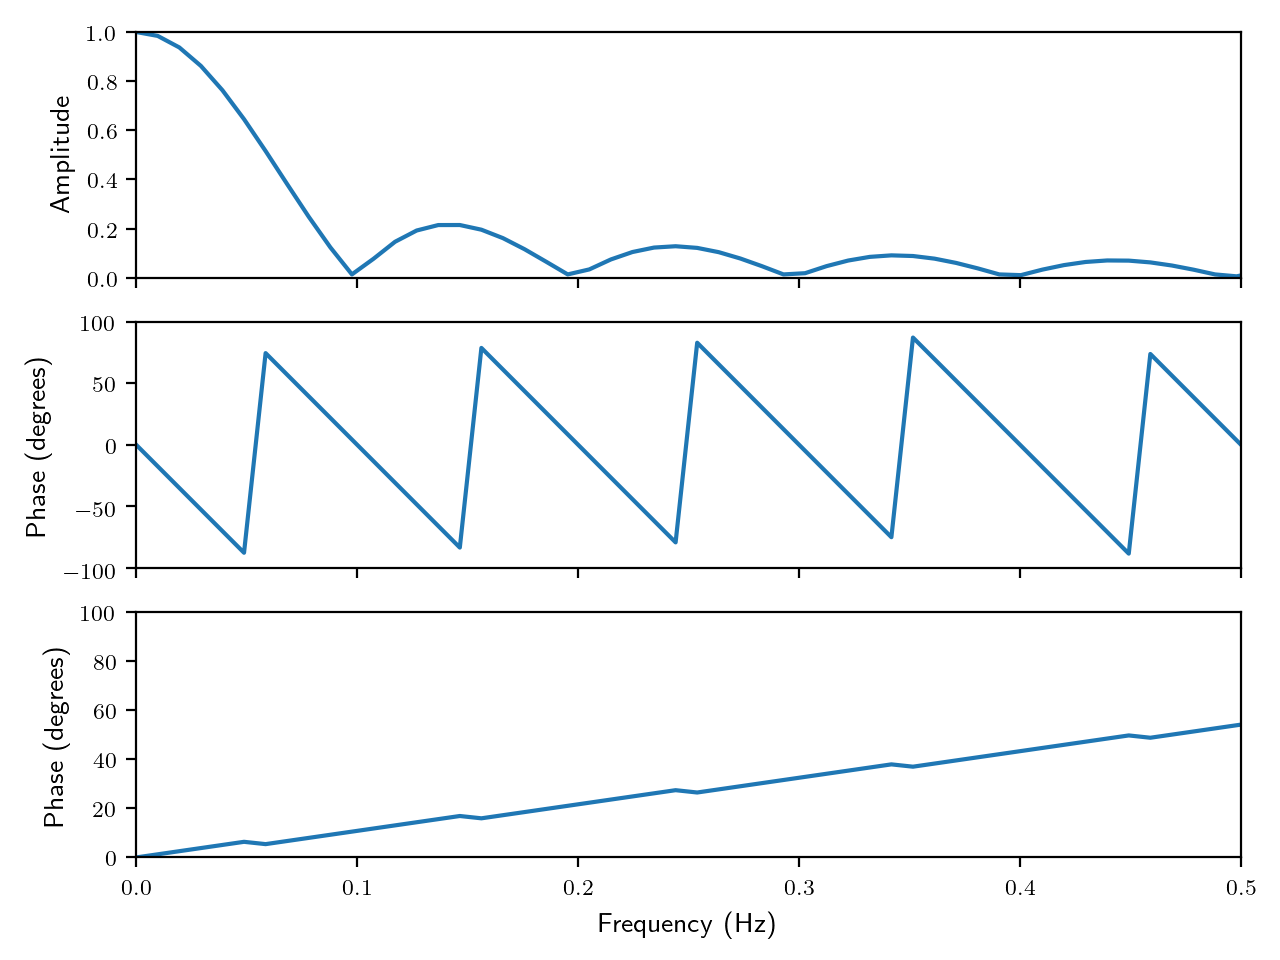

In [16]:
fig, ax = plt.subplots(3,1,sharex=True)

ax[0].plot(w4,amp4)
ax[0].set_xlim(0,0.5)
ax[0].set_ylim(0,1.0)
ax[0].set_ylabel('Amplitude')

ax[1].plot(w4,phs4)
ax[1].set_xlim(0,0.5)
ax[1].set_ylim(-100, 100)
ax[1].set_ylabel('Phase (degrees)')

ax[2].plot(w4,np.unwrap(phs4))
ax[2].set_xlim(0,0.5)
ax[2].set_ylim(0,100)
ax[2].set_ylabel('Phase (degrees)')
ax[2].set_xlabel('Frequency (Hz)')

fig.tight_layout()

# Demo 3: Filter design (see Trauth Ch. 6)

In [17]:
dt = 1.0                       # interval spacing
df = 1/dt                      # sampling frequency
N  = 1001                      # (N) length of time vec
t  = np.linspace(0,1000,N)     # create time vector
y6 = 2*np.sin(2*np.pi*t/50.) + np.sin(2*np.pi*t/15.)  

# Fourier decomposition
f6, pxx6 = signal.periodogram(y6,nfft=2**10,fs=df)

<IPython.core.display.Javascript object>


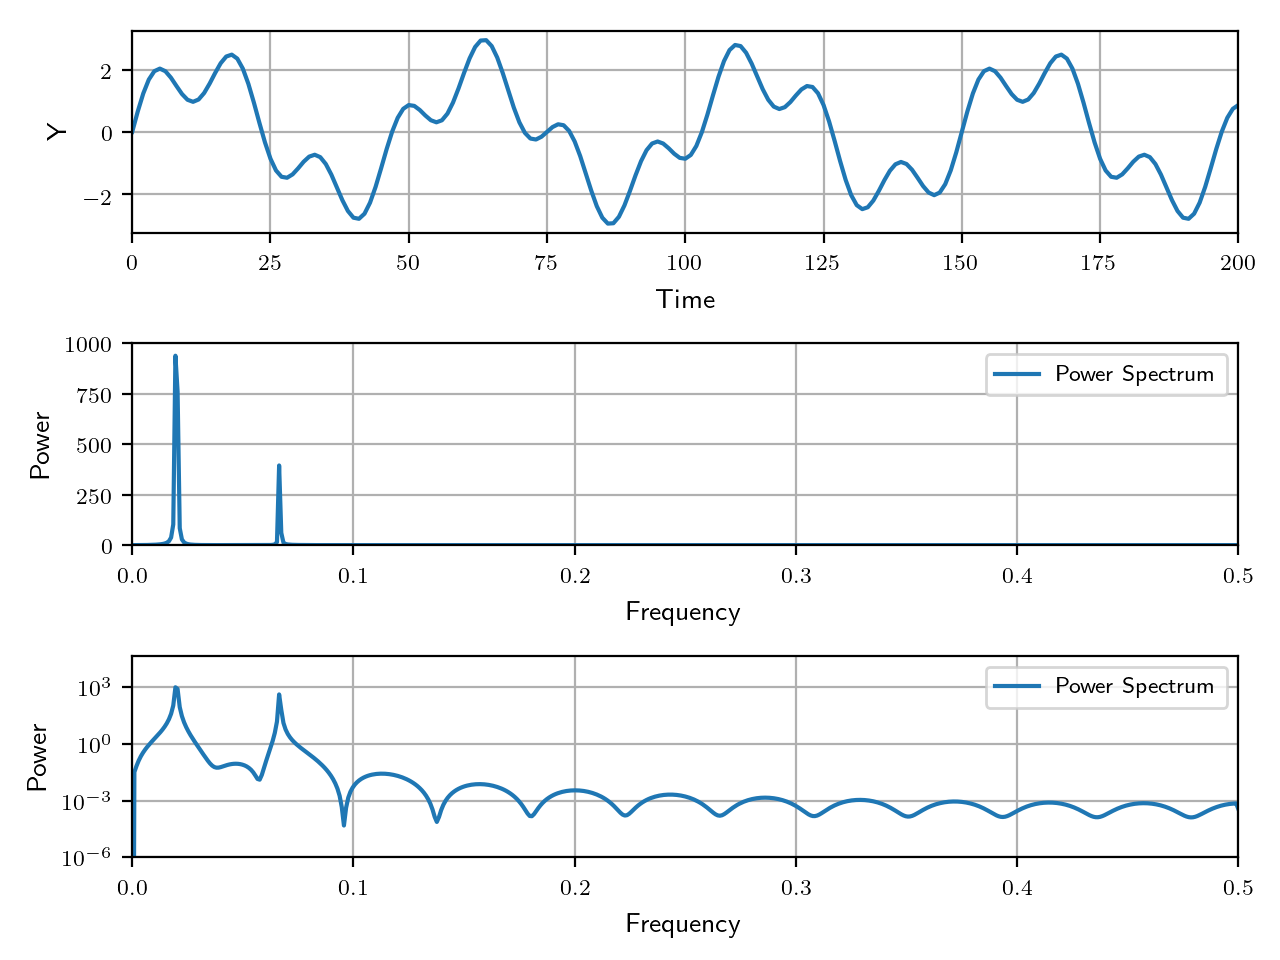

In [18]:
fig, ax = plt.subplots(3,1)
ax[1].get_shared_x_axes().join(ax[1], ax[2])

ax[0].plot(t,y6)
ax[0].set_xlim(0,200)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].plot(f6, pxx6, label='Power Spectrum')
ax[1].legend()
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')
ax[1].set_ylim(0.0,1000.0)
ax[1].grid(True)

ax[2].semilogy(f6, pxx6,label='Power Spectrum')
ax[2].set_ylim(1e-6,None)
ax[2].legend()
ax[2].set_xlim(0.0,0.5)
ax[2].grid(True)
ax[2].grid(which='minor', linestyle='--')

ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power')

fig.tight_layout()

In [19]:
yn6        = y6 + np.random.randn(N)        # add noise
# Fourier decomposition
fn6, pxxn6 = signal.periodogram(yn6,nfft=2**10,fs=df)

<IPython.core.display.Javascript object>


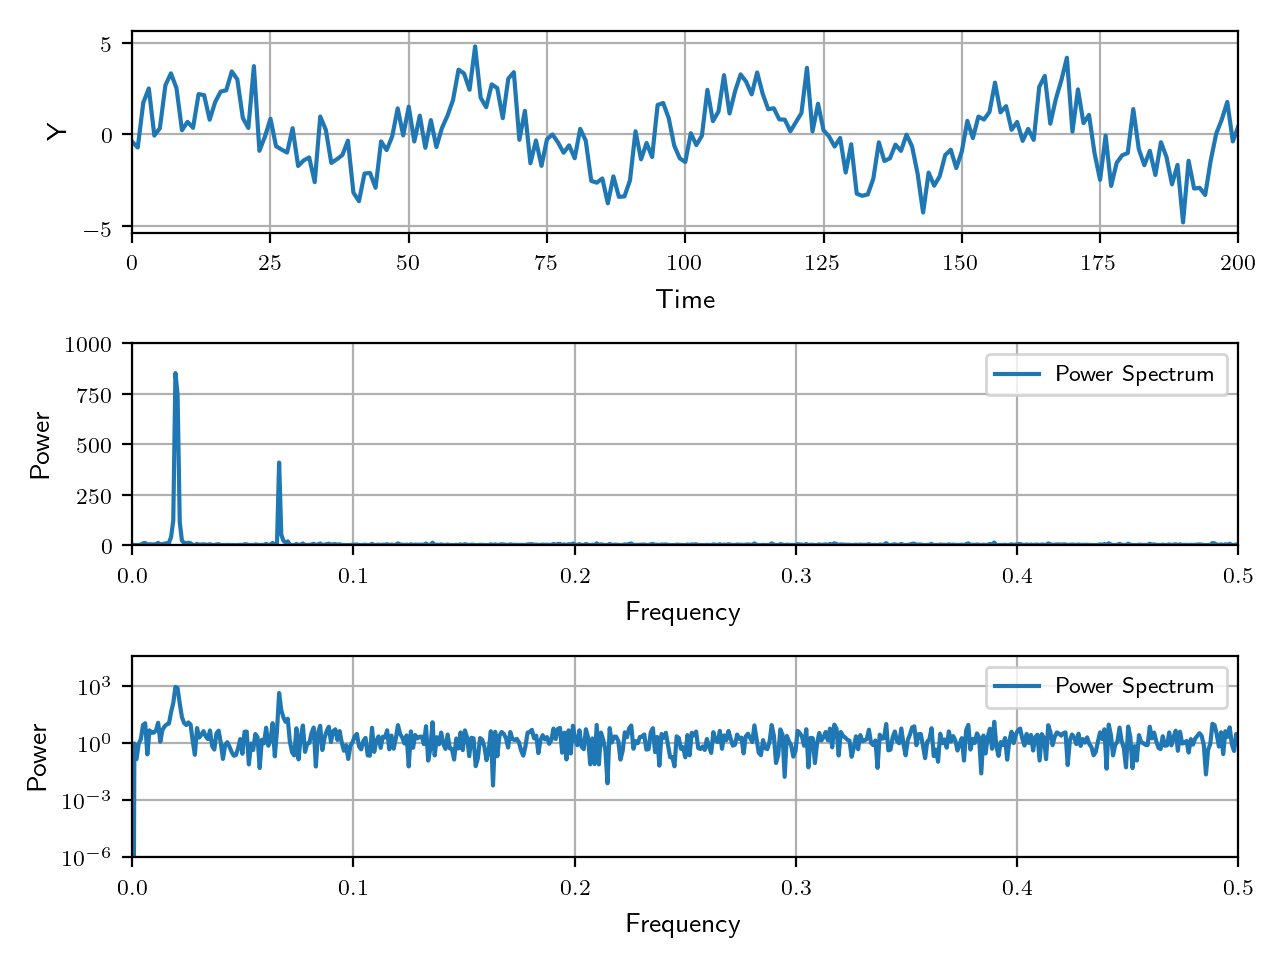

In [20]:
fig, ax = plt.subplots(3,1)
ax[1].get_shared_x_axes().join(ax[1], ax[2])

ax[0].plot(t,yn6)
ax[0].set_xlim(0,200)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].plot(fn6, pxxn6, label='Power Spectrum')
ax[1].legend()
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')
ax[1].set_ylim(0.0,1000.0)
ax[1].grid(True)

ax[2].semilogy(fn6, pxxn6,label='Power Spectrum')
ax[2].set_ylim(1e-6,None)
ax[2].legend()
ax[2].set_xlim(0.0,0.5)
ax[2].grid(True)
ax[2].grid(which='minor', linestyle='--')

ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power')


fig.tight_layout()

__Low-pass Butterworth filter to reduce noise__

In [21]:
# Low-pass Butterworth filter to reduce noise

N_filt = 5          # set filter length (number of samples)
NQ     = 1/(2*dt)   # compute Nyquist frequency
cutoff = 0.08       # set cutoff frequency

# Use scipy.signal function "freqz" to characterize filter frequency response
b6, a6 = signal.butter(N_filt,cutoff/NQ,'low')
w6, h6 = signal.freqz(b6,a6,worN=1024,fs=df)

amp6   = np.sqrt(np.real(h6)**2 + np.imag(h6)**2)        # calculate amplitude 
phs6   = 180*np.arctan(np.imag(h6)/np.real(h6))/np.pi    # calculate phase 

<IPython.core.display.Javascript object>


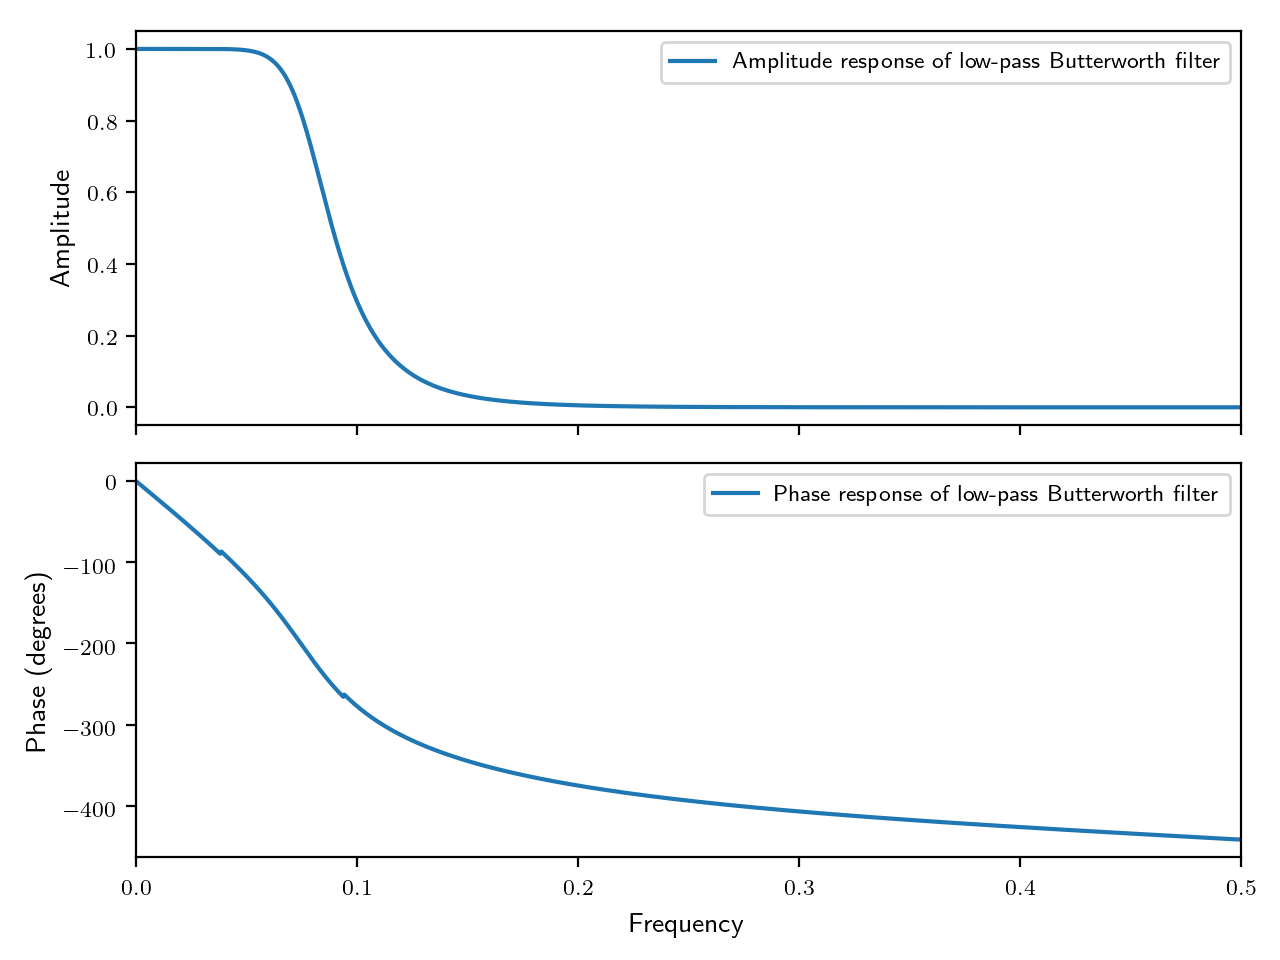

In [22]:
# Show frequency response of low-pass filter
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(w6,amp6,label='Amplitude response of low-pass Butterworth filter')
ax[0].set_ylabel('Amplitude')
ax[0].legend()

ax[1].plot(w6,np.unwrap(phs6),label='Phase response of low-pass Butterworth filter')
ax[1].set_ylabel('Phase (degrees)')
ax[1].set_xlabel('Frequency')
ax[1].legend()

ax[1].set_xlim(0,0.5)

fig.tight_layout()

In [23]:
# Apply the butterworth signal to the noisy data
yn6_filt = signal.filtfilt(b6,a6,yn6)   # Use signal.filtfilt to apply the filter

<IPython.core.display.Javascript object>


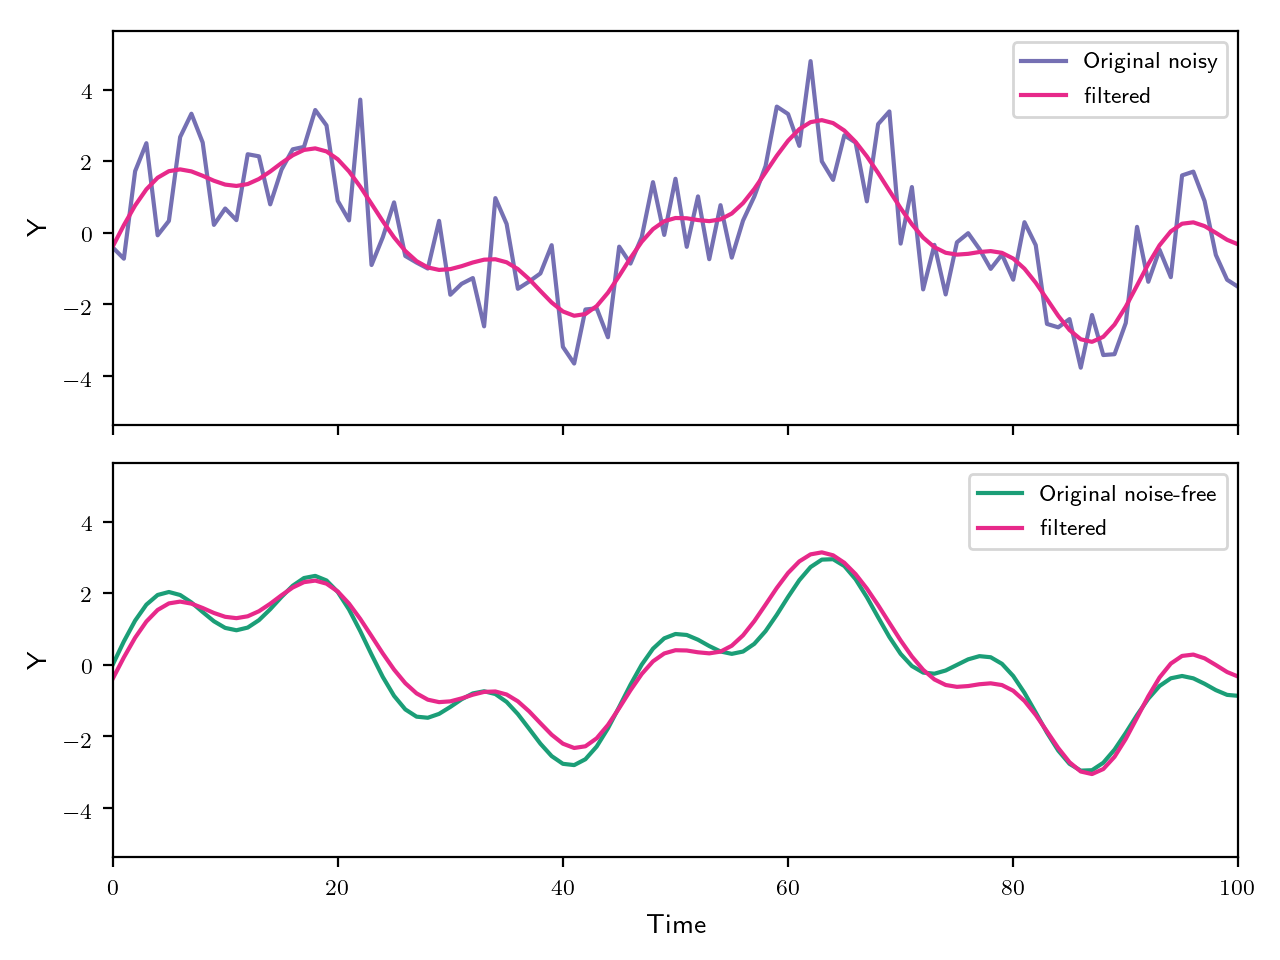

In [24]:
fig, ax = plt.subplots(2,1,sharex=True,sharey=True)

ax[0].plot(t, yn6, label='Original noisy',c='#7570b3')
ax[0].plot(t, yn6_filt, label='filtered', c='#e7298a')
ax[0].legend()
ax[0].set_ylabel('Y')

ax[1].plot(t, y6, label='Original noise-free', c='#1b9e77')
ax[1].plot(t, yn6_filt, label='filtered', c='#e7298a')
ax[1].legend()

ax[1].set_xlim(0,100)
ax[1].set_ylabel('Y')
ax[1].set_xlabel('Time')

fig.tight_layout()

In [25]:
# compute power spectrum of original waveform
fn6, pxxn6   = signal.periodogram(yn6,   nfft=2**10,fs=df)
# compute power spectrum of filtered nosiy waveform
ff6, pxxf6 = signal.periodogram(yn6_filt,nfft=2**10,fs=df)

<IPython.core.display.Javascript object>


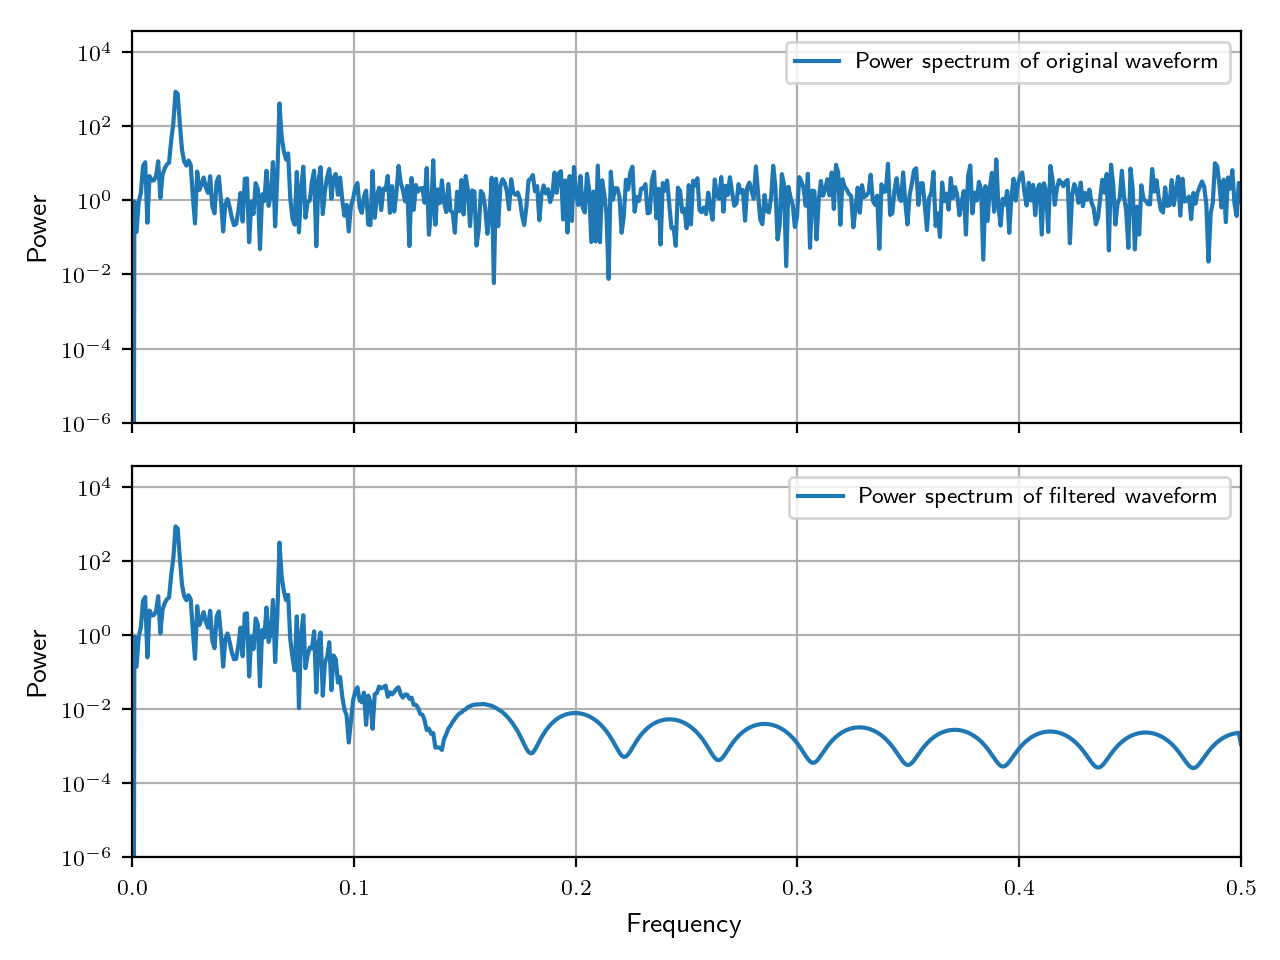

In [26]:
fig, ax = plt.subplots(2,1,sharex=True,sharey=True)

ax[0].semilogy(fn6, pxxn6,label='Power spectrum of original waveform')
ax[0].set_ylim(1e-4,None)
ax[0].legend()
ax[0].grid(True)
ax[0].grid(which='minor', linestyle='--')
ax[0].set_ylabel('Power')

ax[1].semilogy(ff6, pxxf6,label='Power spectrum of filtered waveform')
ax[1].set_ylim(1e-6,None)
ax[1].legend()
ax[1].set_xlim(0.0,0.5)
ax[1].grid(True)
ax[1].grid(which='minor', linestyle='--')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')
fig.tight_layout()

__Bandpass Butterworth filter__

In [27]:
dt = 1.0                        # interval spacing
df = 1/dt                       # sampling frequency
N  = 1001                       # (N) length of time vec
t  = np.linspace(0,1000,N)      # create time vector
y7 = 2*np.sin(2*np.pi*t/50.) + np.sin(2*np.pi*t/15.) + 0.5*np.sin(2*np.pi*t/5)

N_filt  = 5                     # set filter length (number of samples)
NQ      = df/2                  # compute Nyquist frequency
band    = np.array([0.05,0.08]) # set cutoff frequency

# Use scipy.signal function "freqz" to characterize filter frequency response
b8, a8  = signal.butter(N_filt, band/NQ, btype='bandpass')
w8, h8  = signal.freqz(b8,a8,worN=1024,fs=df)
f8      = w8/(2*np.pi)
y8_filt = signal.filtfilt(b8,a8,y7) # Apply the butterworth signal 

# amp6   = np.sqrt(np.real(h6)**2 + np.imag(h6)**2)        # calculate amplitude 
# phs6   = 180*np.arctan(np.imag(h6)/np.real(h6))/np.pi    # calculate phase 

In [28]:
# compute power spectrum of original waveform
f7, pxx7 = signal.periodogram(y7,   nfft=2**10,fs=df)
# compute power spectrum of filtered nosiy waveform
f8, pxx8 = signal.periodogram(y8_filt,nfft=2**10,fs=df)

<IPython.core.display.Javascript object>


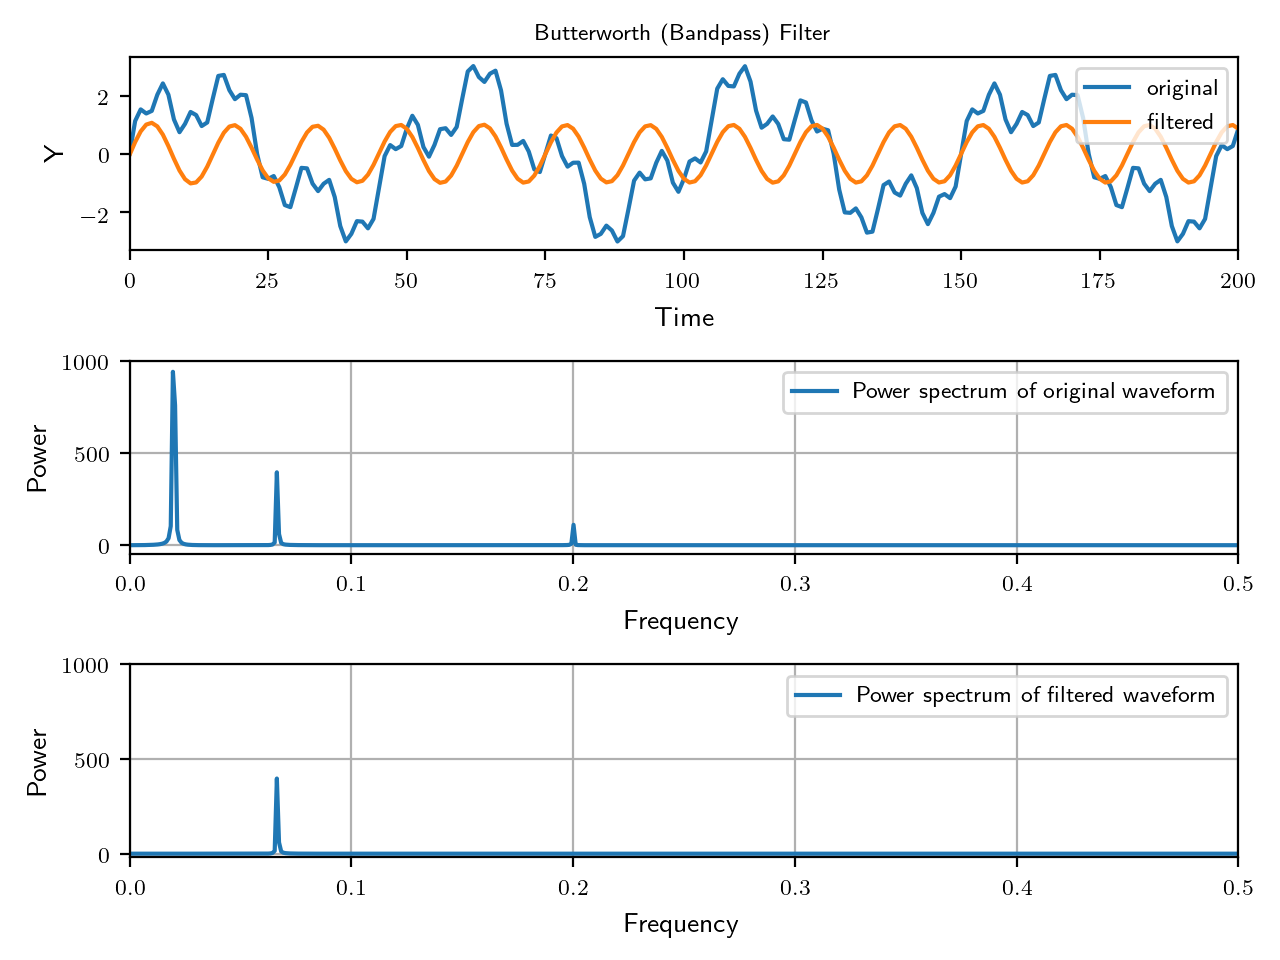

In [29]:
fig, ax = plt.subplots(3,1)
ax[1].get_shared_x_axes().join(ax[1], ax[2])

ax[0].plot(t,y7,label='original')
ax[0].plot(t,y8_filt,label='filtered')
ax[0].set_xlim(0,200)
ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')

ax[1].plot(f7,np.abs(pxx7),label='Power spectrum of original waveform')
ax[1].legend()
ax[1].grid(True)
ax[1].set_ylim(None,1000)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')

ax[2].plot(f8,np.abs(pxx8),label='Power spectrum of filtered waveform')
ax[2].legend()
ax[2].set_ylim(None,1000)
ax[2].legend()
ax[2].set_xlim(0.0,0.5)
ax[2].grid(True)
ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power')

ax[0].set_title('Butterworth (Bandpass) Filter')
fig.tight_layout()

__Bandstop Butterworth filter__

In [30]:
dt = 1.0                        # interval spacing
df = 1/dt                       # sampling frequency
N  = 1001                       # (N) length of time vec
t  = np.linspace(0,1000,N)      # create time vector
y7 = 2*np.sin(2*np.pi*t/50.) + np.sin(2*np.pi*t/15.) + 0.5*np.sin(2*np.pi*t/5)

N_filt  = 5                     # set filter length (number of samples)
NQ      = df/2                  # compute Nyquist frequency
band    = np.array([0.05,0.08]) # set cutoff frequency

# Use scipy.signal function "freqz" to characterize filter frequency response
b9, a9  = signal.butter(N_filt, band/NQ, btype='bandstop')
w9, h9  = signal.freqz(b9,a9,worN=1024,fs=df)
f9      = w8/(2*np.pi)
y9_filt = signal.filtfilt(b9,a9,y7) # Apply the butterworth signal 

# compute power spectrum of original waveform
f7, pxx7 = signal.periodogram(y7,   nfft=2**10,fs=df)
# compute power spectrum of filtered nosiy waveform
f9, pxx9 = signal.periodogram(y9_filt,nfft=2**10,fs=df)

<IPython.core.display.Javascript object>


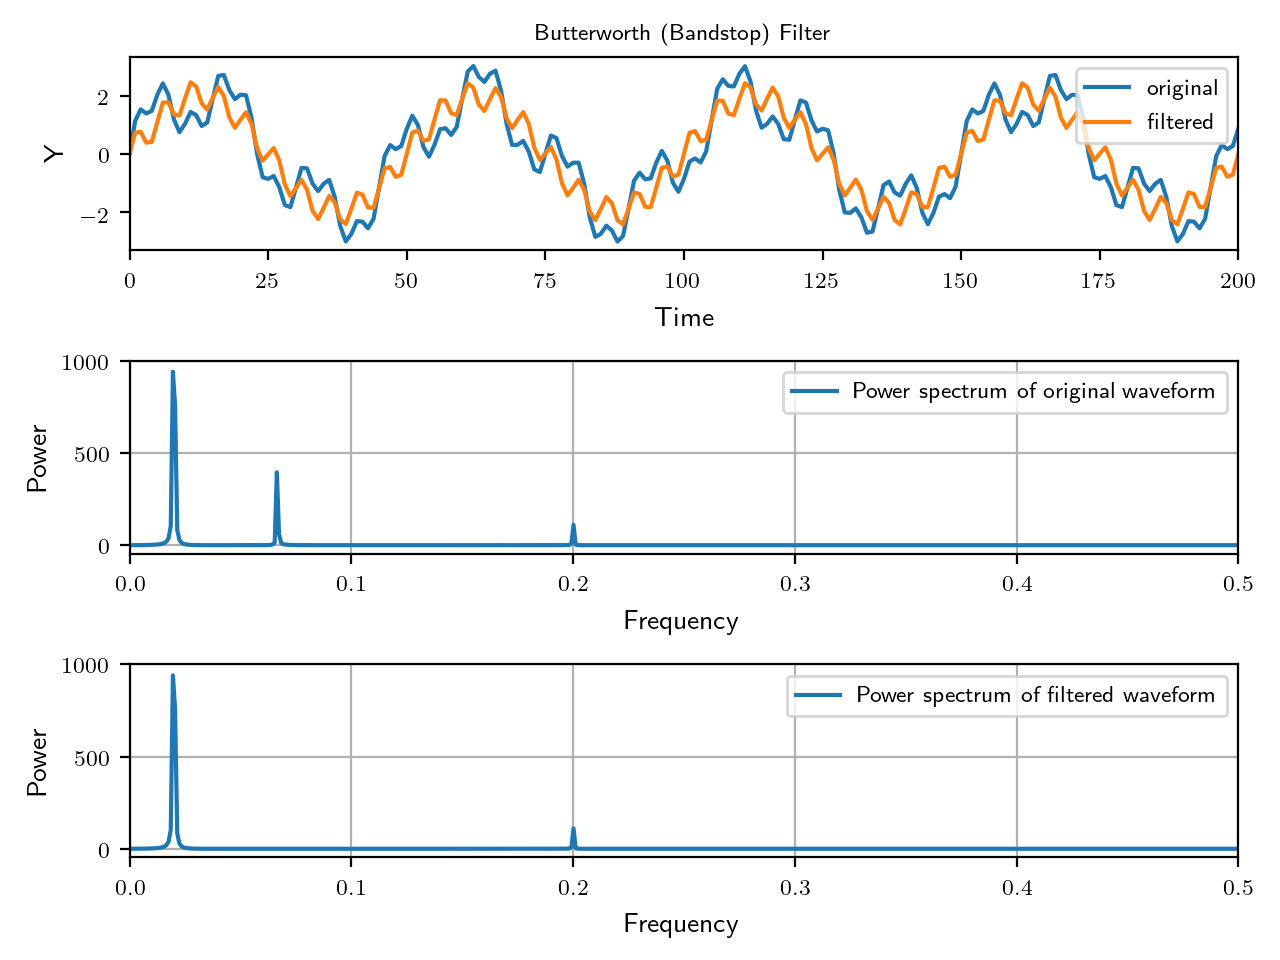

In [31]:
fig, ax = plt.subplots(3,1)
ax[1].get_shared_x_axes().join(ax[1], ax[2])

ax[0].plot(t,y7,label='original')
ax[0].plot(t,y9_filt,label='filtered')
ax[0].set_xlim(0,200)
ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')

ax[1].plot(f7,np.abs(pxx7),label='Power spectrum of original waveform')
ax[1].legend()
ax[1].grid(True)
ax[1].set_ylim(None,1000)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')

ax[2].plot(f9,np.abs(pxx9),label='Power spectrum of filtered waveform')
ax[2].legend()
ax[2].set_ylim(None,1000)
ax[2].legend()
ax[2].set_xlim(0.0,0.5)
ax[2].grid(True)
ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power')

ax[0].set_title('Butterworth (Bandstop) Filter')
fig.tight_layout()

# Demo 4: Filtering in the Fourier domain with `scipy` fft/ifft

In [32]:
dt  = 1.0                       # interval spacing
df  = 1/dt                      # sampling frequency
N   = 1001                      # (N) length of time vec
t   = np.linspace(0,1000,N)     # create time vector
y6  = 2*np.sin(2*np.pi*t/50.) + np.sin(2*np.pi*t/15.)  

yn6 = y6 + np.random.randn(N)   # add noise

# # Fourier decomposition
# f6, pxx6 = signal.periodogram(y6,nfft=2**10,fs=df)

<IPython.core.display.Javascript object>


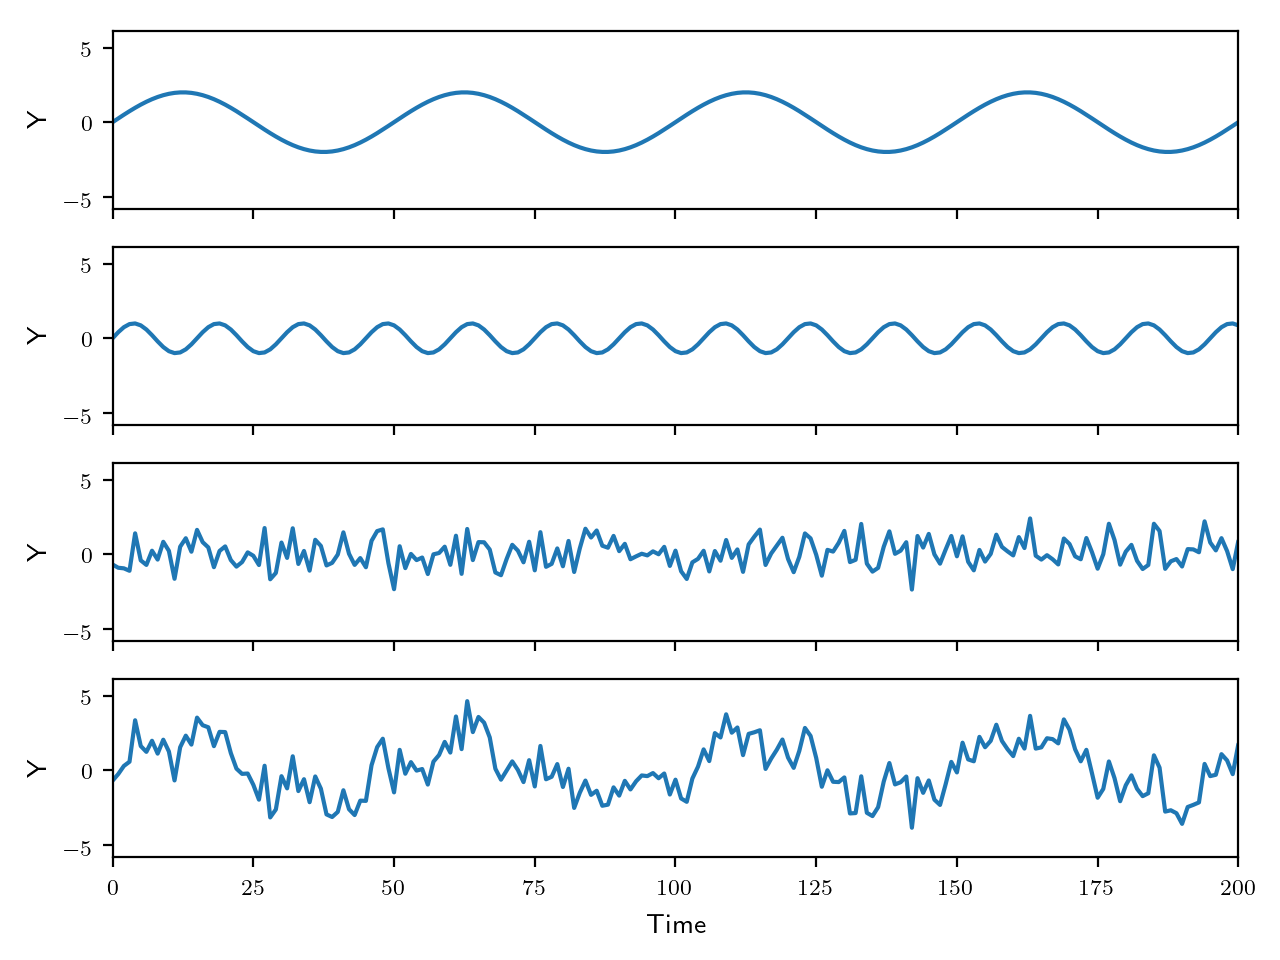

In [33]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)

ax[0].plot(t,2*np.sin(2*np.pi*t/50.))
ax[0].set_ylabel('Y')

ax[1].plot(t,np.sin(2*np.pi*t/15.) )
ax[1].set_ylabel('Y')

ax[2].plot(t,yn6-y6)
ax[2].set_ylabel('Y')

ax[3].plot(t,yn6)
ax[3].set_ylabel('Y')
ax[3].set_xlabel('Time')
ax[3].set_xlim(0,200)
fig.tight_layout()

In [34]:
# Compute FFT and power spectrum
import scipy

yn6_fft = scipy.fft(yn6)        # compute fft
an      = np.real(yn6_fft)      # extract a_n
bn      = np.imag(yn6_fft)      # extract b_n
amp     = np.sqrt(an**2+bn**2)  # extract amplitude
power   = an**2+bn**2           # extract power
phase   = np.arctan(bn/an)      # extract phase 

In [35]:
# construct frequency vector for single-sided spectrum (up to element N/2+1) 
fvec    = df*np.linspace(0,1,N) # df/2 = Nyquist frequency

Compute power spectrum with `signal.periodogram`

In [36]:
fn6, pxxn6 = signal.periodogram(yn6,fs=df,nfft=N)  # Fourier decomposition

<IPython.core.display.Javascript object>


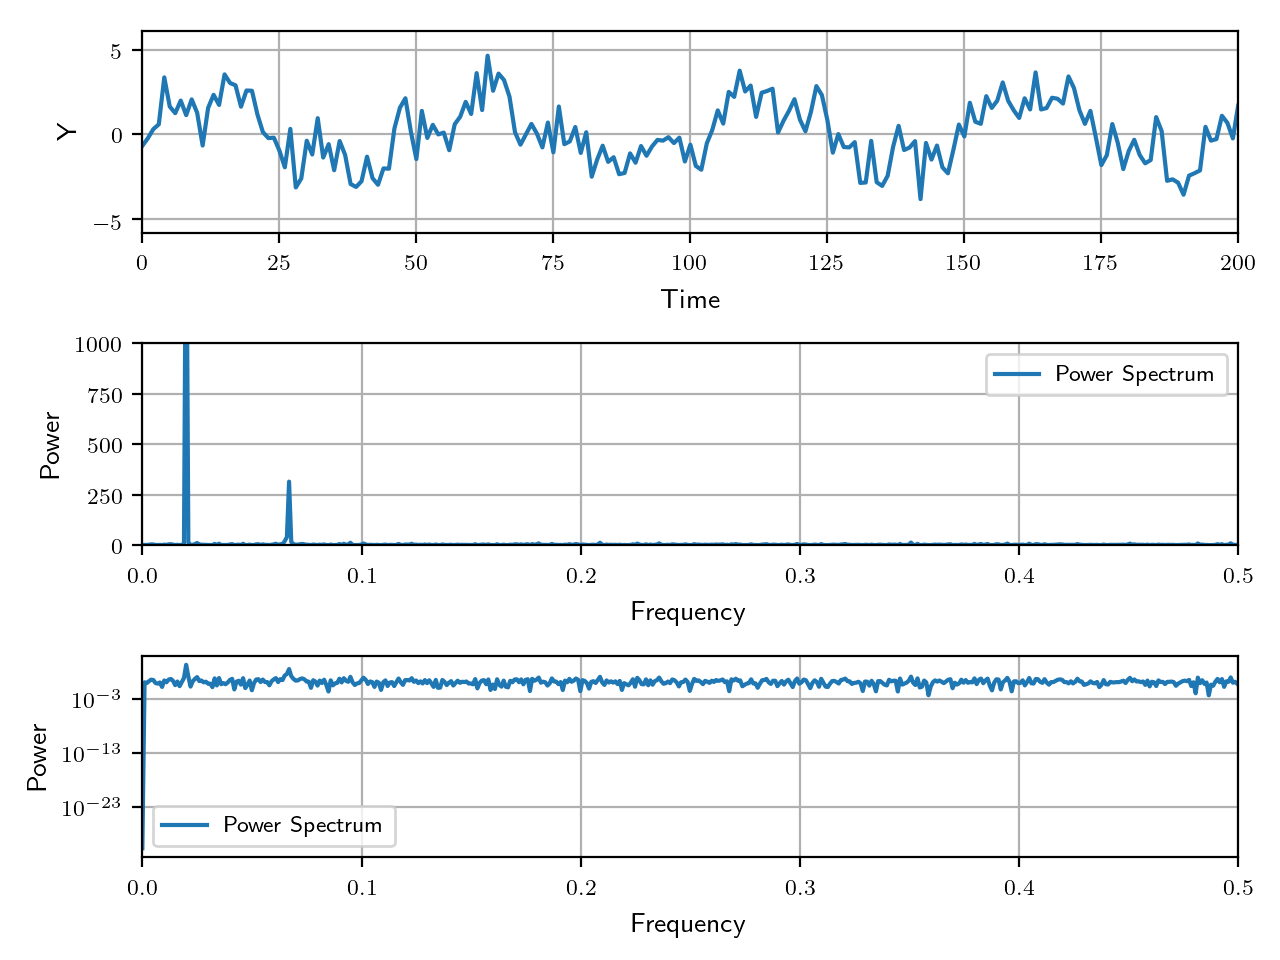

In [37]:
fig, ax = plt.subplots(3,1)
ax[1].get_shared_x_axes().join(ax[1], ax[2])

ax[0].plot(t,yn6)
ax[0].set_xlim(0,200)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].plot(fn6, pxxn6, label='Power Spectrum')
ax[1].legend()
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')
ax[1].set_ylim(0.0,1000.0)
ax[1].grid(True)

ax[2].semilogy(fn6, pxxn6,label='Power Spectrum')
ax[2].legend()
ax[2].set_xlim(0.0,0.5)
ax[2].grid(True)
ax[2].grid(which='minor', linestyle='--')

ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power')


fig.tight_layout()

Construct a crude low-pass filter by setting all frequencies above 0.05 to zero (at both ends of vector)

In [38]:
# Construct a crude low-pass filter by setting all frequencies above
# 0.05 to zero (at both ends of vector)
f1             = np.ones(N)
f1[fvec>=0.05] = 0.0

yn6_filt = yn6_fft*f1             # Filter by multiplication in FD
yn6_ifft = scipy.ifft(yn6_filt)   # transform back into TD
yn6_ifft = np.real(yn6_ifft)

Compute power spectrum of filtered signal with `signal.periodogram`

In [39]:
ff6, pxxf6 = signal.periodogram(yn6_ifft,fs=df,nfft=N)  # Fourier decomposition

<IPython.core.display.Javascript object>


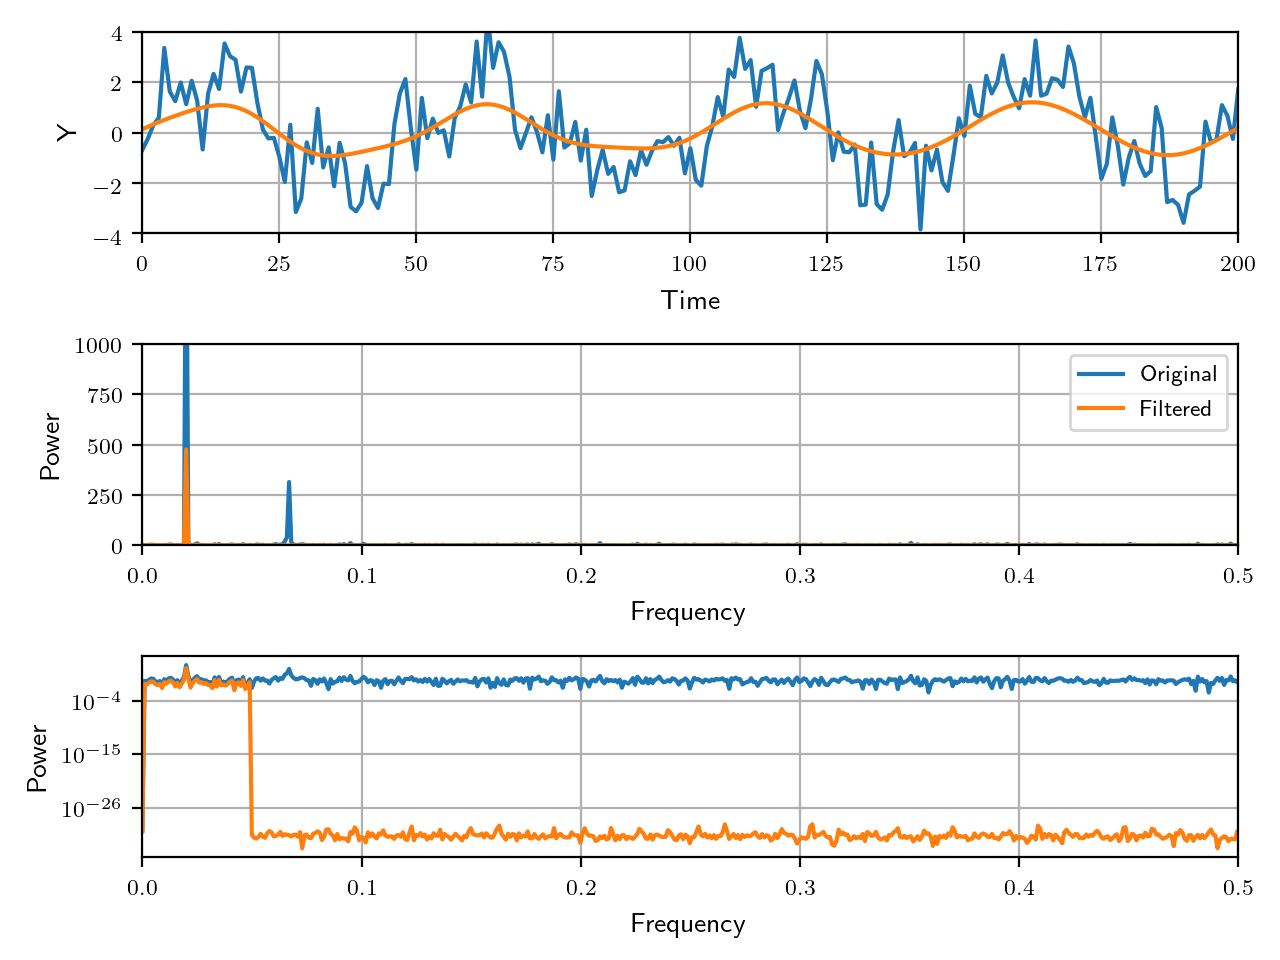

In [40]:
fig, ax = plt.subplots(3,1)
ax[1].get_shared_x_axes().join(ax[1], ax[2])

ax[0].plot(t,yn6)
ax[0].plot(t,yn6_ifft)

ax[0].set_xlim(0,200)
ax[0].set_ylim(-4,4)

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].plot(fn6, pxxn6, label='Original')
ax[1].plot(ff6, pxxf6, label='Filtered')

ax[1].legend()
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')
ax[1].set_ylim(0.0,1000.0)
ax[1].grid(True)

ax[2].semilogy(fn6, pxxn6)
ax[2].semilogy(ff6, pxxf6)

ax[2].set_xlim(0.0,0.5)
ax[2].grid(True)
ax[2].grid(which='minor', linestyle='--')

ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power')


fig.tight_layout()

Hmmm this doesn't seem to replicate the matlab demo exactly. There appears to be some lost power, especially at the 0.05 Hz frequency. 